In [1]:
import sys
sys.path.append('..')

In [2]:
from src.data.load_data import get_hackernews_files, load_hackernews_dataframe

In [3]:
files = get_hackernews_files()

In [4]:
path = [x for x in files if x.endswith('HN_2017-01')][0]

In [5]:
df = load_hackernews_dataframe(path)
df.head()

,by,dead,deleted,descendants,id,kids,parent,parts,poll,retrieved_on,score,text,time,title,type,url
0,jfc,NaN,NaN,NaN,13293889,NaN,13291930.0,NaN,NaN,1500612003,NaN,An extraordinary artist. I&#x27;m glad he was ...,1483228806,NaN,comment,NaN
1,greglindahl,NaN,NaN,NaN,13293890,NaN,13292161.0,NaN,NaN,1500612003,NaN,"And for those who are wondering what I meant, ...",1483228834,NaN,comment,NaN
2,imron,NaN,NaN,NaN,13293891,NaN,13293408.0,NaN,NaN,1500612003,NaN,Perhaps they&#x27;re trying to learn from the ...,1483228850,NaN,comment,NaN
3,zzzcpan,NaN,NaN,NaN,13293892,[13293927],13293875.0,NaN,NaN,1500612002,NaN,Russians are the most likely users of the Ukra...,1483228857,NaN,comment,NaN
4,theWatcher37,NaN,NaN,NaN,13293893,"[13293974, 13295659]",13293826.0,NaN,NaN,1500612002,NaN,Crowd funding makes sense however when there i...,1483228879,NaN,comment,NaN


In [6]:
df.count()

by              235752
dead             11727
deleted           7055
descendants      25513
id              242807
kids            103821
parent          208530
parts                5
poll                53
retrieved_on    242807
score            33023
text            204548
time            242807
title            32970
type            242807
url              30994
dtype: int64

In [7]:
comments = df[df['type'] == 'comment']

In [26]:
from src.filters import use_n_most_occuring_users
user_df = use_n_most_occuring_users(comments, 5000)

In [27]:
from src.graphbuilder import GraphBuilder
gb = GraphBuilder()

In [28]:
gb.extend_graph(user_df)
story_graph = gb.graph

19445it [00:11, 1675.80it/s]


In [29]:
story_graph.ecount()



1781

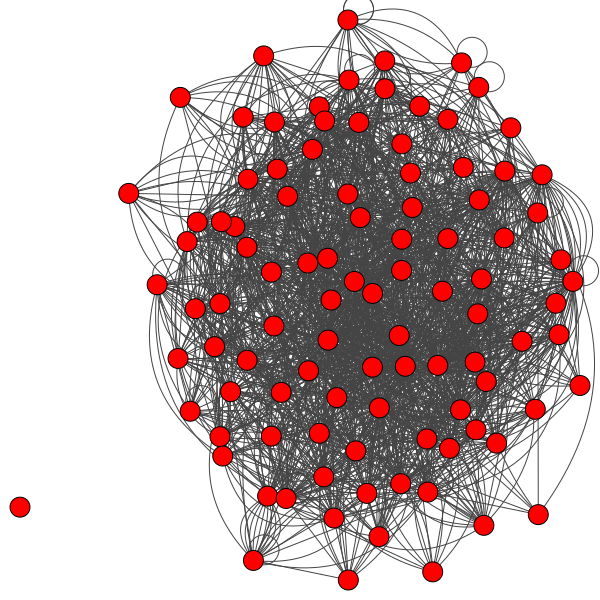

In [36]:
from igraph import plot
layout = story_graph.layout('kk')
plot(story_graph, layout=layout)

In [34]:
story_graph.ecount()

1781

In [17]:
# https://stackoverflow.com/questions/25254151/using-igraph-in-python-for-community-detection-and-writing-community-number-for
dendogram = story_graph.community_edge_betweenness()


In [18]:
print(dendogram)

Dendrogram, 100 elements, 98 merges


In [19]:
type(dendogram)

igraph.clustering.VertexDendrogram

In [20]:
dendogram.optimal_count

45